# Brain Tumor Classification Task
Alessio Carnevale, Manuel Cattoni, Carlo Schillaci

Dataset link: [Kaggle](https://www.kaggle.com/datasets/pkdarabi/brain-tumor-image-dataset-semantic-segmentation/data)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import json

In [26]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pkdarabi/brain-tumor-image-dataset-semantic-segmentation")

print("Path to dataset files:", path)

Path to dataset files: /Users/alessiocarnevale/.cache/kagglehub/datasets/pkdarabi/brain-tumor-image-dataset-semantic-segmentation/versions/1


In [39]:
with open('Dataset/train/_annotations.coco.json','r') as file:
    train = json.load(file)

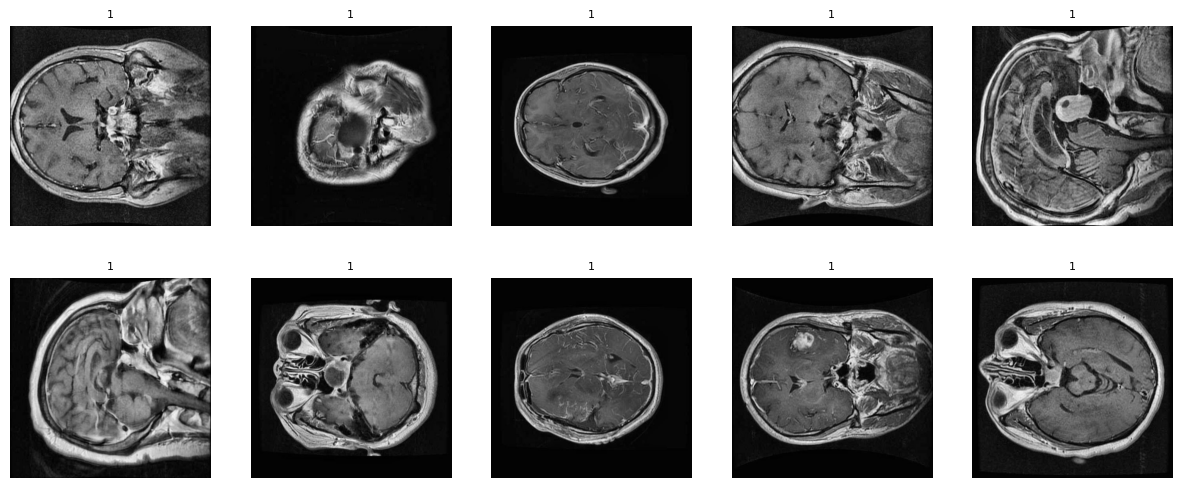

In [46]:
import os
import random
from skimage import io

random_images = random.sample(train['images'], 10)

plt.figure(figsize=(15, 6))

for i, img_info in enumerate(random_images):
    img_path = os.path.join('Dataset/train', img_info['file_name'])
    
    img = io.imread(img_path)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(img_info['license'], fontsize=8)
    plt.axis('off')

plt.show()

In [54]:

import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def display_image_with_annotations(ax, image, annotations, display_type='both', colors=None):
    ax.imshow(image)
    ax.axis('off')  # Turn off the axes

    # Define a default color map if none is provided
    if colors is None:
        colors = plt.cm.tab10

    for ann in annotations:
        category_id = ann['category_id']
        color = colors(category_id % 10)
        
        # Display bounding box
        if display_type in ['bbox', 'both']:
            bbox = ann['bbox']
            # print(bbox)
            rect = patches.CirclePolygon ((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor=color, facecolor='none')
            ax.add_patch(rect)
        
        # Display segmentation polygon
        if display_type in ['seg', 'both']:
            for seg in ann['segmentation']:
                poly = [(seg[i], seg[i+1]) for i in range(0, len(seg), 2)]
                # print(poly)
                polygon = patches.Polygon(poly, closed=True, edgecolor=color, fill=False)
                ax.add_patch(polygon)

def display_images_with_coco_annotations(image_paths, annotations, display_type='both', colors=None):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    for ax, img_path in zip(axs.ravel(), image_paths):
        # Load image using OpenCV and convert it from BGR to RGB color space
        image = io.imread(img_path)

        # Get image filename to match with annotations
        img_filename = os.path.basename(img_path)
        img_id = next(item for item in annotations['images'] if item["file_name"] == img_filename)['id']
        
        # Filter annotations for the current image
        img_annotations = [ann for ann in annotations['annotations'] if ann['image_id'] == img_id]
        
        display_image_with_annotations(ax, image, img_annotations, display_type, colors)

    plt.tight_layout()
    plt.show()

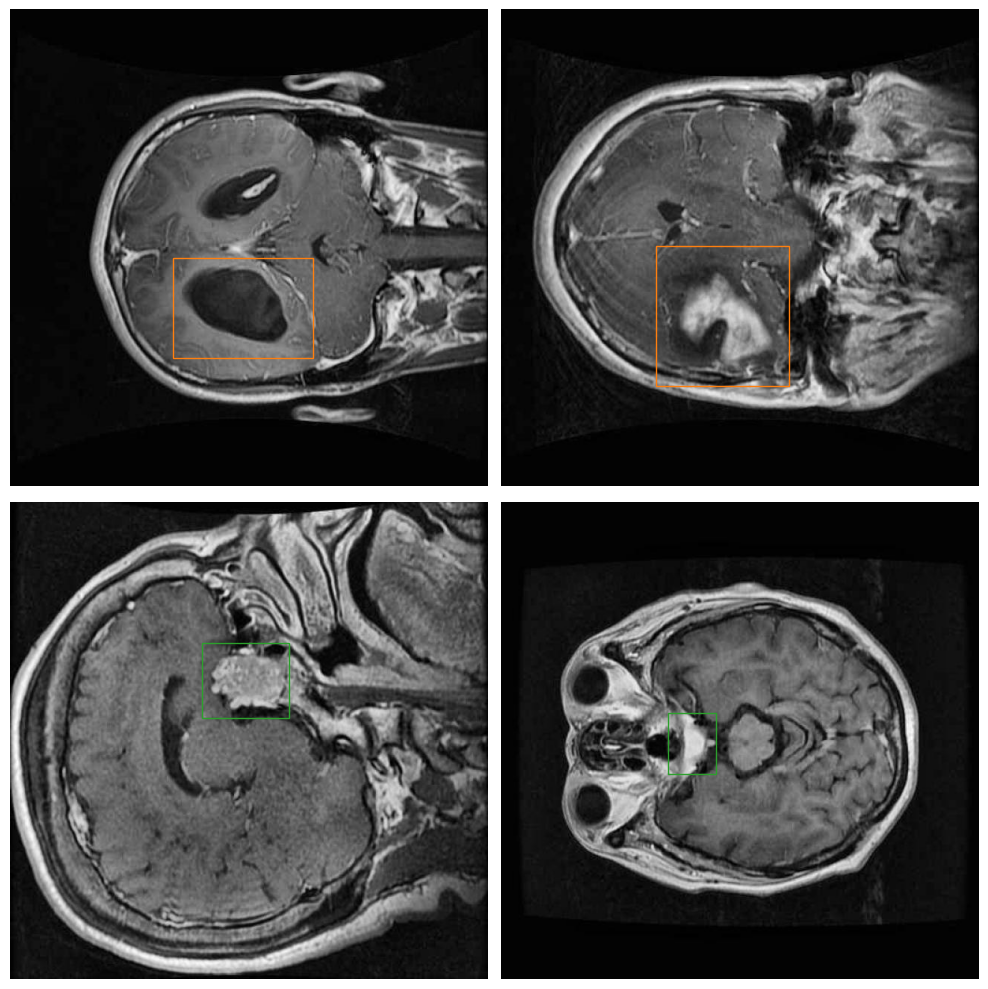

In [ ]:
all_image_files = [os.path.join('Dataset/train', img['file_name']) for img in train['images']]
random_image_files = random.sample(all_image_files, 4)

# Choose between 'bbox', 'seg', or 'both'
display_type = 'seg'
display_images_with_coco_annotations(random_image_files, train, display_type)